# In this task I will using industry standard analysis for this spatial dataset

### Cross Industry Standard process for Data Analysis (CRIPS)

1. Business Understanding
2. Data Understanding (Understand the problems)
3. Data Preparation(Cleaning)
4. Data Modelling or Evaluation (Analysis)
5. Deployment (Report, Presentation, Dashboard)

# Problem 1: Map out the location of all the Restaurants
    # Where are the most number of Zomato registered Restaurants Located
    # Top ten locations with most registered restaurants
    # Top ten locations with most registered restaurants
    
    
# Problem 2: Information about order type
    # Online odering process Check


# Problem 3: Provider best and worse location interms of their rating
    # Map out regions with good rating


## 1.. Lets Read Data For Analysis

In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# reading the dataset

zomato_df = pd.read_csv(r"C:\Users\Amos\Documents\Geospatial Analysis with Python Project\Spatial Analysis local File\zomato.csv")
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# print(zomato_df.head())

In [8]:
zomato_df.shape

(51717, 17)

In [9]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### 2... Pre-processing

In [12]:
# Checking Duplicated Data
zomato_df.duplicated().sum()

0

In [13]:
zomato_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [67]:
#Drop Dataset with Missing Location
zomato_df.dropna(subset=["location"], inplace = True)

In [68]:
df = zomato_df.copy() # Creating A copy for the dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51696 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51696 non-null  object
 1   address                      51696 non-null  object
 2   name                         51696 non-null  object
 3   online_order                 51696 non-null  object
 4   book_table                   51696 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51696 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51696 n



## 3.. Extract Latitudes & longitudes from data..

### Getting Locational Data from another OpenStreetMap

#### definition of latitudes & Longitudes :
    The globe is split into an imaginary 360 sections from both top to bottom (north to south) 
    and 180 sections from side to side (west to east). The sections running from top to bottom on a globe are called
    longitude and the sections running from side to side on a globe are called latitude.
    

In [70]:
df["location"].value_counts()

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [71]:
# Adding other basic locational information to the location (State region and Country)
df["location"]  = df["location"] + " , Bangalore, Karnataka, India"
df["location"]

0               Banashankari , Bangalore, Karnataka, India
1               Banashankari , Bangalore, Karnataka, India
2               Banashankari , Bangalore, Karnataka, India
3               Banashankari , Bangalore, Karnataka, India
4               Basavanagudi , Bangalore, Karnataka, India
                               ...                        
51712             Whitefield , Bangalore, Karnataka, India
51713             Whitefield , Bangalore, Karnataka, India
51714             Whitefield , Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield , Bangalore, Karnat...
51716    ITPL Main Road, Whitefield , Bangalore, Karnat...
Name: location, Length: 51696, dtype: object

In [72]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [73]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### First we need to learn how to extract latitudes and Longitude using "location" column

In [74]:
unique_loc = df["location"].unique() # Getting all the Unique Locations
len(unique_loc)

93

In [75]:
# Creating an empty DF for location
location_df = pd.DataFrame()
location_df

""


In [76]:
location_df["Name"] = unique_loc
location_df

,Name
0,"Banashankari , Bangalore, Karnataka, India"
1,"Basavanagudi , Bangalore, Karnataka, India"
2,"Mysore Road , Bangalore, Karnataka, India"
3,"Jayanagar , Bangalore, Karnataka, India"
4,"Kumaraswamy Layout , Bangalore, Karnataka, India"
...,...
88,"West Bangalore , Bangalore, Karnataka, India"
89,"Magadi Road , Bangalore, Karnataka, India"
90,"Yelahanka , Bangalore, Karnataka, India"
91,"Sahakara Nagar , Bangalore, Karnataka, India"


In [77]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from geopy.geocoders import Nominatim
# Nominatim is used to search openstreetmap data by address pf location

In [79]:
geolocator = Nominatim(user_agent="Nonw", timeout=None) # Initiate the nominatim  and setting the timeout to none

In [80]:
lat = [] # creating an empty list to store all the latitude
long = [] # creating an empty list to store all the Longitude

for name in location_df["Name"]:
    #print(name)
    lat_long = geolocator.geocode(name)
    
    if lat_long is None:
        lat.append(np.nan)
        long.append(np.nan)
    
    else:
        lat.append(lat_long.latitude)
        long.append(lat_long.longitude)
        
        
print("Completed")   

Completed


In [81]:
# lat

In [82]:
location_df["Latitude"], location_df["Longitude"] = lat, long
location_df

,Name,Latitude,Longitude
0,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",12.952903,77.515800
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061


In [85]:
location_df.isna().sum() #Checking the Locations not found through Nominatum

Name         0
Latitude     3
Longitude    3
dtype: int64

In [86]:
location_df[location_df["Latitude"].isnull()]["Name"].value_counts()

Name
ITPL Main Road, Whitefield , Bangalore, Karnataka, India    1
Rammurthy Nagar , Bangalore, Karnataka, India               1
Sadashiv Nagar , Bangalore, Karnataka, India                1
Name: count, dtype: int64

In [87]:
# Getting the coordinates of the three missing records from google search

# 13.0083° N, 77.7221° E, (ITPL Main Road, Whitefield , Bangalore, Karnataka, India)

# 13.0085° N, 77.6737° E, (Rammurthy Nagar , Bangalore, Karnataka, India)

# 13.0068° N, 77.5813° E (Sadashiv Nagar , Bangalore, Karnataka, India)

In [88]:
location_df[location_df["Longitude"].isnull()]

,Name,Latitude,Longitude
64,"ITPL Main Road, Whitefield , Bangalore, Karnat...",NaN,NaN
79,"Rammurthy Nagar , Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar , Bangalore, Karnataka, India",NaN,NaN


In [89]:
# Filling the missing values with the cordinates from Google search

location_df.at[64,"Latitude"],location_df.at[79,"Latitude"], location_df.at[85,"Latitude"]  = 13.0083, 13.0085, 13.0068
location_df.at[64,"Longitude"],location_df.at[79,"Longitude"], location_df.at[85,"Longitude"]  = 77.7221, 77.6737, 77.5813

In [90]:
location_df[location_df["Longitude"].isnull()]

,Name,Latitude,Longitude


In [91]:
location_df.isna().sum()

Name         0
Latitude     0
Longitude    0
dtype: int64

# Problem 1:
## Where are the most number of Zomato registered Restaurants Located

In [93]:
# Summarizing Dataset bu location to know the location and their number of registered restaurants 
restaurant_count = pd.DataFrame(df["location"].value_counts())
restaurant_count

,count
location,
"BTM , Bangalore, Karnataka, India",5124
"HSR , Bangalore, Karnataka, India",2523
"Koramangala 5th Block , Bangalore, Karnataka, India",2504
"JP Nagar , Bangalore, Karnataka, India",2235
"Whitefield , Bangalore, Karnataka, India",2144
...,...
"West Bangalore , Bangalore, Karnataka, India",6
"Yelahanka , Bangalore, Karnataka, India",6
"Jakkur , Bangalore, Karnataka, India",3


In [94]:
restaurant_count.reset_index( inplace = True)
restaurant_count.columns = ["Name", "Count"]

restaurant_count

,Name,Count
0,"BTM , Bangalore, Karnataka, India",5124
1,"HSR , Bangalore, Karnataka, India",2523
2,"Koramangala 5th Block , Bangalore, Karnataka, ...",2504
3,"JP Nagar , Bangalore, Karnataka, India",2235
4,"Whitefield , Bangalore, Karnataka, India",2144
...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",6
89,"Yelahanka , Bangalore, Karnataka, India",6
90,"Jakkur , Bangalore, Karnataka, India",3
91,"Rajarajeshwari Nagar , Bangalore, Karnataka, I...",2


In [95]:
location_df

,Name,Latitude,Longitude
0,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",12.952903,77.515800
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061


In [97]:
#Merging with Location Dataset

location_rest_count = pd.merge(location_df, restaurant_count, on = ["Name"], how = "outer", indicator = True)
location_rest_count

,Name,Latitude,Longitude,Count,_merge
0,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621,906,both
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502,684,both
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090,22,both
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423,1926,both
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502,195,both
...,...,...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",12.952903,77.515800,6,both
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356,34,both
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345,6,both
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061,53,both


In [98]:
location_rest_count["_merge"].value_counts()

_merge
both          93
left_only      0
right_only     0
Name: count, dtype: int64

In [99]:
location_rest_count.drop(["_merge"], axis = 1, inplace = True)

In [100]:
location_rest_count

,Name,Latitude,Longitude,Count
0,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621,906
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502,684
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090,22
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423,1926
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502,195
...,...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",12.952903,77.515800,6
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356,34
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345,6
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061,53


In [102]:
# Top ten location with most restaurants registered

top_ten = location_rest_count.sort_values(["Count"], ascending = False).head(10)
top_ten

,Name,Latitude,Longitude,Count
13,"BTM , Bangalore, Karnataka, India",12.911276,77.604565,5124
18,"HSR , Bangalore, Karnataka, India",12.911623,77.638862,2523
23,"Koramangala 5th Block , Bangalore, Karnataka, ...",12.934843,77.618977,2504
8,"JP Nagar , Bangalore, Karnataka, India",12.909694,77.586607,2235
30,"Whitefield , Bangalore, Karnataka, India",12.996400,77.761423,2144
33,"Indiranagar , Bangalore, Karnataka, India",12.973291,77.640467,2083
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423,1926
19,"Marathahalli , Bangalore, Karnataka, India",12.955257,77.698416,1846
12,"Bannerghatta Road , Bangalore, Karnataka, India",12.902753,77.601367,1630
29,"Bellandur , Bangalore, Karnataka, India",12.936121,77.667184,1286


In [103]:
# Bottom ten location with least restaurants registered

bottom_ten = location_rest_count.sort_values(["Count"], ascending = True).head(10)
bottom_ten

,Name,Latitude,Longitude,Count
92,"Peenya , Bangalore, Karnataka, India",13.033051,77.533223,1
5,"Rajarajeshwari Nagar , Bangalore, Karnataka, I...",12.927441,77.515522,2
78,"Jakkur , Bangalore, Karnataka, India",13.078474,77.606894,3
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345,6
88,"West Bangalore , Bangalore, Karnataka, India",12.952903,77.515800,6
61,"Central Bangalore , Bangalore, Karnataka, India",12.973009,77.580471,8
11,"Nagarbhavi , Bangalore, Karnataka, India",12.965122,77.509010,9
83,"Kengeri , Bangalore, Karnataka, India",12.917657,77.483757,9
82,"Hebbal , Bangalore, Karnataka, India",13.038218,77.591900,14
73,"North Bangalore , Bangalore, Karnataka, India",13.022235,77.567183,14


In [ ]:
!pip install folium

In [105]:
import folium # Folium is used to display the density map on open streetmap

In [108]:
# Defining a function for the base map
def Generate_basemap():
    basemap = folium.Map(location=[12.97 , 77.59])
    return basemap

In [111]:
basemap = Generate_basemap()

In [129]:
from folium.plugins import HeatMap, FastMarkerCluster

In [113]:
location_rest_count.head()

,Name,Latitude,Longitude,Count
0,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621,906
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502,684
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090,22
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423,1926
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.906768,77.559502,195


In [114]:
restaurant_mapping_df = location_rest_count[['Latitude', 'Longitude', 'Count']]

In [115]:
restaurant_mapping_df

,Latitude,Longitude,Count
0,12.927820,77.556621,906
1,12.941726,77.575502,684
2,12.946662,77.530090,22
3,12.929273,77.582423,1926
4,12.906768,77.559502,195
...,...,...,...
88,12.952903,77.515800,6
89,12.975608,77.555356,34
90,13.100698,77.596345,6
91,13.062147,77.580061,53


In [116]:
HeatMap(restaurant_mapping_df).add_to(basemap)

In [117]:
basemap

# Observation: Most resgistered restaurants are withing the city centre
# Recomendation: We need to onbaord more restuarant at the city outskirt and also some region with zero registered restaurants

## Performing Marker Cluster Analysis !
        Similar to previous one , but just use Marker Cluster 

In [130]:
basemap = Generate_basemap()

In [131]:
FastMarkerCluster(restaurant_mapping_df).add_to(basemap)

In [132]:
basemap

## Plotting all the markers of places of Bangalore !

Plotting Markers on the Map :

    Folium gives a folium.Marker() class for plotting markers on a map
    Just pass the latitude and longitude of the location, mention the popup and tooltip and add it to the map.

#### Plotting markers is a two-step process.
    1) you need to create a base map on which your markers will be placed
    2) and then add your markers to it:

In [133]:
m = Generate_basemap() ## it will generate basemap

In [136]:
# Add points to the map

for index , row in restaurant_mapping_df.iterrows():
    folium.Marker(location = [row['Latitude'] , row['Longitude']] , popup=row['Count']).add_to(m)

In [137]:
m

# Information about order type

In [138]:
order_type = pd.DataFrame(df["online_order"].value_counts()).reset_index()
order_type

,online_order,count
0,Yes,30444
1,No,21252


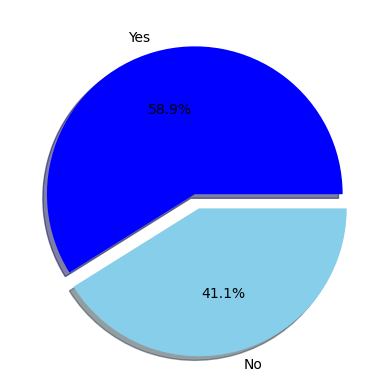

In [139]:
# Pie chart

cat = order_type["online_order"]
score = order_type["count"]
chat_color = ["blue", "skyblue"]
explode = (0,0.1)
plt.pie(score, labels= cat, colors = chat_color, explode = explode, autopct = "%0.1f%%", shadow=True)
# plt.savefig("")
plt.show()

# Observation: About 60% of the people order the restaurants online
# Recommendation: To inporve online ordering, discount can be given to discourage physical odering process

In [140]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


# Problem 3: Provider best and worse location interms of their rating

In [141]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
Actual Rating                   7754
dtype: int64

## In order to Analyse where are the restaurants situated with high average rate , 
        first we need to clean 'rate' feature ..

In [142]:
# Replace Method to cleaning rate column

In [143]:
df["Actual Rating"] = df["rate"].str.replace("/5", "")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield,NaN
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield,NaN
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield , Bangalore, Karnat...",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3


In [144]:
df["Actual Rating"].value_counts()

Actual Rating
NEW     2208
3.9     2098
3.8     2022
3.7     2011
3.9     1874
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: count, Length: 64, dtype: int64

In [145]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
Actual Rating                  object
dtype: object

In [146]:
# df["Actual Rating"] = df["Actual Rating"].astype(float)
df["Actual Rating"] = pd.to_numeric(df["Actual Rating"], errors='coerce')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield,NaN
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield,NaN
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield , Bangalore, Karnat...",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3


In [147]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Actual Rating                  float64
dtype: object

In [148]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
Actual Rating                  10031
dtype: int64

In [149]:
test_df = df[df["location"] == "Banashankari , Bangalore, Karnataka, India"]
round(test_df["Actual Rating"].mean(),1)

3.6

In [150]:
test_df["Actual Rating"] = test_df["Actual Rating"].fillna(round(test_df["Actual Rating"].mean(),1))
test_df

C:\Users\Amos\AppData\Local\Temp\ipykernel_30448\1354819278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Actual Rating"] = test_df["Actual Rating"].fillna(round(test_df["Actual Rating"].mean(),1))


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,"Banashankari , Bangalore, Karnataka, India","Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32994,https://www.zomato.com/bangalore/my-tea-house-...,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,080 49652475,"Banashankari , Bangalore, Karnataka, India",Casual Dining,NaN,"Continental, Asian",800,"[('Rated 4.0', ""RATED\n So apparently I visit...","['Cream of Chicken Soup', 'Chicken Classic Str...",Delivery,Koramangala 6th Block,3.6
38108,https://www.zomato.com/bangalore/sai-super-san...,"99, 3rd Main Road, Hanumanthnagar, Banashankar...",Sai Super Sandwich,Yes,No,NEW,0,+91 9535736455\n+91 9880156554,"Banashankari , Bangalore, Karnataka, India",Quick Bites,NaN,"Sandwich, Beverages",200,[],[],Delivery,Lavelle Road,3.6
38109,https://www.zomato.com/bangalore/sai-super-san...,"99, 3rd Main Road, Hanumanthnagar, Banashankar...",Sai Super Sandwich,Yes,No,NEW,0,+91 9535736455\n+91 9880156554,"Banashankari , Bangalore, Karnataka, India",Quick Bites,NaN,"Sandwich, Beverages",200,[],[],Delivery,Lavelle Road,3.6
42790,https://www.zomato.com/bangalore/sai-super-san...,"99, 3rd Main Road, Hanumanthnagar, Banashankar...",Sai Super Sandwich,Yes,No,NEW,0,+91 9535736455\n+91 9880156554,"Banashankari , Bangalore, Karnataka, India",Quick Bites,NaN,"Sandwich, Beverages",200,[],[],Delivery,MG Road,3.6


In [151]:
# filling_missing rating using for loop of location ratings

In [152]:
unique_loc

rating_df = pd.DataFrame()
for location in unique_loc:
    locationdf = df[df["location"] == location][["location", "Actual Rating"]]
    locationdf["Actual Rating"] = locationdf["Actual Rating"].fillna(round(locationdf["Actual Rating"].mean(),1))
    rating_df = pd.concat([rating_df, locationdf], ignore_index = True)

In [153]:
rating_df

,location,Actual Rating
0,"Banashankari , Bangalore, Karnataka, India",4.1
1,"Banashankari , Bangalore, Karnataka, India",4.1
2,"Banashankari , Bangalore, Karnataka, India",3.8
3,"Banashankari , Bangalore, Karnataka, India",3.7
4,"Banashankari , Bangalore, Karnataka, India",4.6
...,...,...
51691,"Sahakara Nagar , Bangalore, Karnataka, India",3.6
51692,"Sahakara Nagar , Bangalore, Karnataka, India",3.4
51693,"Sahakara Nagar , Bangalore, Karnataka, India",3.6
51694,"Sahakara Nagar , Bangalore, Karnataka, India",3.6


In [154]:
rating_result = pd.DataFrame(rating_df.groupby(["location"])["Actual Rating"].mean()).reset_index()

In [155]:
rating_result["Actual Rating"].max()

4.139130434782609

In [156]:
rating_result.sort_values(["Actual Rating"], ascending = False)

,location,Actual Rating
51,"Lavelle Road , Bangalore, Karnataka, India",4.139130
43,"Koramangala 3rd Block , Bangalore, Karnataka, ...",4.018056
81,"St. Marks Road , Bangalore, Karnataka, India",4.016761
45,"Koramangala 5th Block , Bangalore, Karnataka, ...",4.005391
12,"Church Street , Bangalore, Karnataka, India",3.992443
...,...,...
61,"North Bangalore , Bangalore, Karnataka, India",3.328571
64,"Peenya , Bangalore, Karnataka, India",3.200000
7,"Bommanahalli , Bangalore, Karnataka, India",3.194538
63,"Old Madras Road , Bangalore, Karnataka, India",3.181818


In [157]:
df[df["location"] == "Jakkur , Bangalore, Karnataka, India"]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
15250,https://www.zomato.com/bangalore/red-savina-ja...,"Shreyas 3rd Cross, Shabari Layout, Venkteshwar...",Red Savina,No,No,NaN,0,+91 9739855469,"Jakkur , Bangalore, Karnataka, India",Delivery,NaN,"North Indian, South Indian, Chinese, Mughlai",400,[],[],Delivery,Frazer Town,NaN
24419,https://www.zomato.com/bangalore/red-savina-ja...,"Shreyas 3rd Cross, Shabari Layout, Venkteshwar...",Red Savina,No,No,NaN,0,+91 9739855469,"Jakkur , Bangalore, Karnataka, India",Delivery,NaN,"North Indian, South Indian, Chinese, Mughlai",400,[],[],Delivery,Kalyan Nagar,NaN
25691,https://www.zomato.com/bangalore/red-savina-ja...,"Shreyas 3rd Cross, Shabari Layout, Venkteshwar...",Red Savina,No,No,NaN,0,+91 9739855469,"Jakkur , Bangalore, Karnataka, India",Delivery,NaN,"North Indian, South Indian, Chinese, Mughlai",400,[],[],Delivery,Kammanahalli,NaN


In [158]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [159]:
# Option 2 for Rating Extraction: Using Split Function in Pandas

In [160]:
df["Actual Rating2"] = df["rate"].str.split("/", expand = True)[0]
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating,Actual Rating2
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,3.8


In [161]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Actual Rating,Actual Rating2
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi , Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,3.6
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield,NaN,NaN
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,"Whitefield , Bangalore, Karnataka, India",Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield,NaN,NaN
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield , Bangalore, Karnat...",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3,4.3


In [163]:
df['rate'].isnull().sum()/len(df)*100 ## ie approximately 15% of your rating belongs to missing values..

14.999226245744351

In [168]:
df.dropna(subset = ['rate'] , inplace = True)
df['rating'] = df['rate'].str.replace('/5' ,'') ## replace "/5" with ''

In [170]:
df['rating'].replace('NEW' , '0' , inplace=True)
df['rating'].replace('-' , '0' , inplace=True)

## Note:the decision of replacing {"New" -> "0"} & ("-" -> "0") can be changed ,as it depends upon domain expertise & your business analyst..

In [171]:
df['rating'] = df['rating'].astype(float) ## converting its data-type into float

## .. Most highest rated restaurants ?

In [173]:
grp_df = df.groupby(['location'] , as_index=False).agg({'rating':'mean' , 'name':'size'})

## size tells total order placed at various locations ...
## bcz more number of order means high chances of restaurant being famous or popular !

In [174]:
grp_df.columns = ['Name' , 'avg_rating' , 'count']

In [175]:
grp_df


,Name,avg_rating,count
0,"BTM , Bangalore, Karnataka, India",3.296128,4261
1,"Banashankari , Bangalore, Karnataka, India",3.373292,805
2,"Banaswadi , Bangalore, Karnataka, India",3.362926,499
3,"Bannerghatta Road , Bangalore, Karnataka, India",3.271677,1324
4,"Basavanagudi , Bangalore, Karnataka, India",3.478185,628
...,...,...,...
87,"West Bangalore , Bangalore, Karnataka, India",2.020000,5
88,"Whitefield , Bangalore, Karnataka, India",3.384170,1693
89,"Wilson Garden , Bangalore, Karnataka, India",3.257635,203
90,"Yelahanka , Bangalore, Karnataka, India",3.640000,5


In [176]:
grp_df['count']>400

0      True
1      True
2      True
3      True
4      True
      ...  
87    False
88     True
89    False
90    False
91    False
Name: count, Length: 92, dtype: bool

In [177]:
temp_df = grp_df[grp_df['count']>400]

In [178]:
temp_df

,Name,avg_rating,count
0,"BTM , Bangalore, Karnataka, India",3.296128,4261
1,"Banashankari , Bangalore, Karnataka, India",3.373292,805
2,"Banaswadi , Bangalore, Karnataka, India",3.362926,499
3,"Bannerghatta Road , Bangalore, Karnataka, India",3.271677,1324
4,"Basavanagudi , Bangalore, Karnataka, India",3.478185,628
6,"Bellandur , Bangalore, Karnataka, India",3.309833,1078
8,"Brigade Road , Bangalore, Karnataka, India",3.595849,1084
9,"Brookefield , Bangalore, Karnataka, India",3.374699,581
12,"Church Street , Bangalore, Karnataka, India",3.963091,550
15,"Cunningham Road , Bangalore, Karnataka, India",3.901053,475


In [180]:
Ratings_locations = pd.merge(location_df, temp_df, on = ["Name"], how = "right", indicator = True)
Ratings_locations

,Name,Latitude,Longitude,avg_rating,count,_merge
0,"BTM , Bangalore, Karnataka, India",12.911276,77.604565,3.296128,4261,both
1,"Banashankari , Bangalore, Karnataka, India",12.927820,77.556621,3.373292,805,both
2,"Banaswadi , Bangalore, Karnataka, India",13.014162,77.651854,3.362926,499,both
3,"Bannerghatta Road , Bangalore, Karnataka, India",12.902753,77.601367,3.271677,1324,both
4,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502,3.478185,628,both
5,"Bellandur , Bangalore, Karnataka, India",12.936121,77.667184,3.309833,1078,both
6,"Brigade Road , Bangalore, Karnataka, India",12.973644,77.607508,3.595849,1084,both
7,"Brookefield , Bangalore, Karnataka, India",12.965209,77.717936,3.374699,581,both
8,"Church Street , Bangalore, Karnataka, India",12.975700,77.602083,3.963091,550,both
9,"Cunningham Road , Bangalore, Karnataka, India",12.988425,77.593898,3.901053,475,both


In [181]:
basemap = Generate_basemap()

In [183]:
HeatMap(Ratings_locations[['Latitude', 'Longitude' , 'avg_rating']]).add_to(basemap)

In [184]:
basemap